In [1]:
import math
import numpy as np
import pandas as pd
import scipy
from scipy.special import erfc
from math import sqrt
import matplotlib.pyplot as plt

%matplotlib inline

#  Glover & Balmer (1954)
# Streamflow depletion with fully-penetrating stream and no streambed.

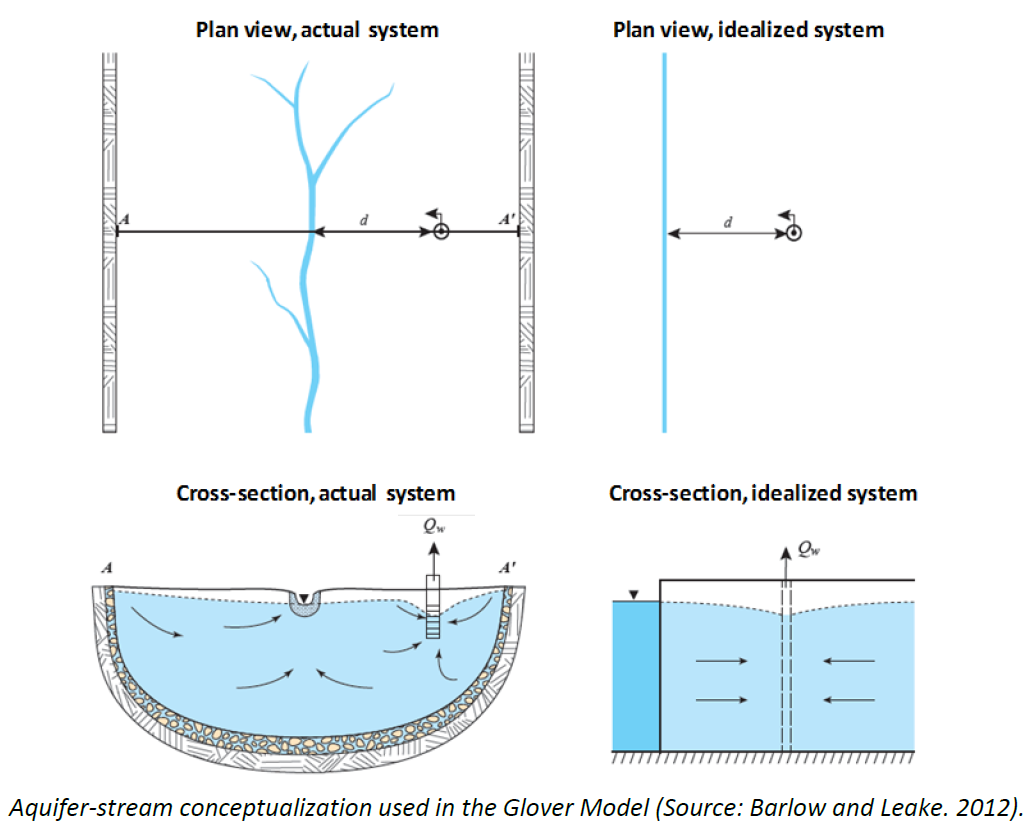

In [2]:
from IPython.display import Image 
pil_img = Image(filename='./Conceptual_models/Glover1954.png')
display(pil_img)

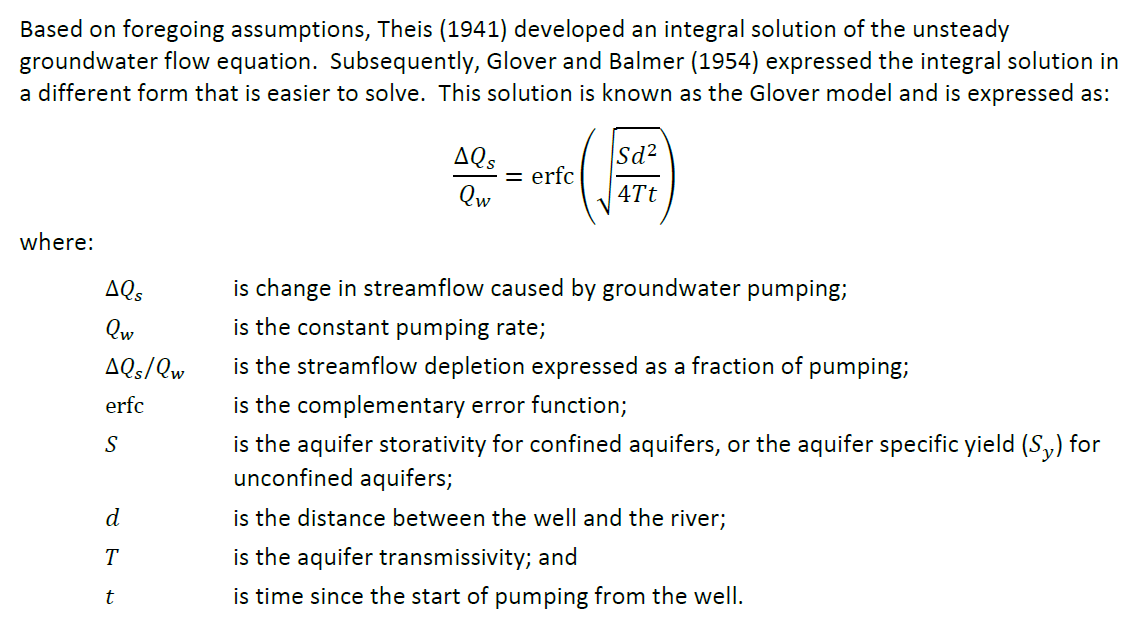

In [3]:
pil_img = Image(filename='./Conceptual_models/Glover1954_f.png')
display(pil_img)

In [4]:
  # It contains numerous assumptions:
  #   Horizontal flow >> vertical flow (Dupuit assumptions hold)
  #   Homogeneous, isotropic aquifer
  #   Constant {Tr}: Aquifer is confined, or if unconfined change in head is small relative to aquifer thickness
  #   Stream is straight, infinitely long, and remains in hydraulic connection to aquifer
  #   Constant stream stage
  #   item No changes in recharge due to pumping
  #   item No streambank storage
  #   item Constant pumping rate
  #   item Aquifer extends to infinity
# item Stream fully penetrates through aquifer (see {Hunt} or {Hantush} for partially penetrating stream)
# No streambed resistance to flow (see {hunt} or {hantush} for streambed resistance)
# }
# return A numeric of {Qf}, 
# streamflow depletion as fraction of pumping rate [-].
# If the pumping rate of the well ({Qw}; [L3/T]) is known, 
# you can calculate volumetric streamflow depletion [L3/T] as {Qf*Qw}
# references
# Glover, RE, and GG Balmer (1954).River Depletion Resulting from Pumping a Well near a River.
# Eos, Transactions American Geophysical Union 35(3): 468-70. doi:10.1029/TR035i003p00468.
#
# Theis, CV (1941). The Effect of a Well on the Flow of a Nearby Stream.
# Eos, Transactions American Geophysical Union 22(3): 734-38. https://doi.org/10.1029/TR022i003p00734.

In [5]:
# constants
S = 0.14      # param S aquifer storage coefficient []
d = 693.35         # param d distance from well to stream [L]
Tr = 10       # param Tr aquifer transmissivity [L2/T]
# t = 365       # param t times you want output for [T]

In [6]:
# pumping rate of the well ({Qw}; [L3/T])
df = pd.read_csv("daily_pumpings.csv", header=0)
df

,time,Pump_rate,base,time_2,diff
0,1,16761.11674,16761.11674,1.0,0.000000
1,2,16761.11674,16761.11674,2.0,0.000000
2,3,16761.11674,16761.11674,3.0,0.000000
3,4,16761.11674,16761.11674,4.0,0.000000
4,5,16761.11674,16761.11674,5.0,0.000000
...,...,...,...,...,...
360,361,17202.19876,16761.11674,26.0,441.082026
361,362,17202.19876,16761.11674,27.0,441.082026
362,363,17202.19876,16761.11674,28.0,441.082026
363,364,17202.19876,16761.11674,29.0,441.082026


In [7]:
# return SFD for base pumping rates
df['capture1'] =  df['base'] * (erfc(sqrt((S * d**2))/(4* Tr * df['time'])))

In [8]:
# return SFD  to apply seaonlaity pumpings
df['capture2'] =  df['diff'] * (erfc(sqrt((S * d**2))/(4* Tr * df['time_2'])))

In [9]:
df['capture']= df['capture1'] + df['capture2']
df

,time,Pump_rate,base,time_2,diff,capture1,capture2,capture
0,1,16761.11674,16761.11674,1.0,0.000000,7.771145e-16,0.000000,7.771145e-16
1,2,16761.11674,16761.11674,2.0,0.000000,7.570114e-02,0.000000,7.570114e-02
2,3,16761.11674,16761.11674,3.0,0.000000,3.742363e+01,0.000000,3.742363e+01
3,4,16761.11674,16761.11674,4.0,0.000000,3.661588e+02,0.000000,3.661588e+02
4,5,16761.11674,16761.11674,5.0,0.000000,1.116122e+03,0.000000,1.116122e+03
...,...,...,...,...,...,...,...,...
360,361,17202.19876,16761.11674,26.0,441.082026,1.642137e+04,319.456695,1.674082e+04
361,362,17202.19876,16761.11674,27.0,441.082026,1.642230e+04,323.787401,1.674609e+04
362,363,17202.19876,16761.11674,28.0,441.082026,1.642324e+04,327.826034,1.675106e+04
363,364,17202.19876,16761.11674,29.0,441.082026,1.642417e+04,331.600609,1.675577e+04


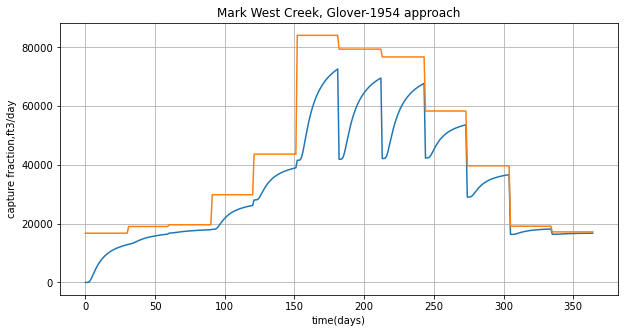

In [10]:
# SFD = streamflow depletion factor
fig = plt.figure(figsize=(10, 5))
plt.plot(df.capture)
plt.plot(df.Pump_rate)
plt.title("Mark West Creek, Glover-1954 approach")
plt.xlabel('time(days)')
plt.ylabel('capture fraction,ft3/day')
plt.grid(True)

In [11]:
# Annual Capture fraction in acr.ft
Total = df['capture'].sum()
print(Total*2.29569e-5)

274.98795525897924


In [12]:
# np.savetxt("seasonality_Glover.csv", capture, delimiter="/")